# **Análise exploratória dos dados do Airbnb - Bruxelas (Brussels), Bélgica**

Neste projeto, iremos fazer uma análise exploratória dos dados do [**Airbnb**](https://www.airbnb.com.br/) para a cidade de **Bruxelas** que fica na **Bélgica**.

**Airbnb:**
> O Airbnb é um *marketplace* online para anunciar, descobrir ou reservar hospedagens, principalmente, casas de família ou experiências de turismo. A empresa não possui qualquer imóvel, nem hospeda eventos; ela atua como um corretor, recebendo comissões por cada reserva (Para mais informações: [clique aqui](https://en.wikipedia.org/wiki/Airbnb)).
> 
> O Airbnb já é considerado a **maior empresa hoteleira do mundo, não possuindo qualquer hotel**.


**Bruxelas:**
> Bruxelas é uma cidade turística da Bélgica, que fica no continente Europeu. É onde está localizada sede do **Parlamento Europeu** e também da **OTAN (Organização do Tratado do Atlântico Norte)**, além de diversas outras atrações turísticas como: o [*Grand Place*](https://en.wikipedia.org/wiki/Grand_Place), o [*Manneken Pis*](https://en.wikipedia.org/wiki/Manneken_Pis), o [bairro de *Sablon*](https://en.wikipedia.org/wiki/Sablon,_Brussels), entre outras atrações. (Para mais informações: [clique aqui](https://www.melhoresdestinos.com.br/o-que-fazer-em-bruxelas-belgica-dicas.html))


Com isso, está análise tem como principais objetivos:
- Verificar o preço das hospedagens em Bruxelas;
- Verificar o tipo das hospedagens disponíveis;
- Verificar a média do mínimo de noites para alugar.

## **Carregando o Conjunto de Dados**

Todos os dados utilizados nesta análise foram obtido através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [21]:
# Importando as bibliotecas necessárias
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

In [22]:
# Importando o conjunto de dados
df_bru = pd.read_csv("http://data.insideairbnb.com/belgium/bru/brussels/2019-11-19/visualisations/listings.csv")

## **Análise dos dados**

Os atributos do conjunto de dados são:

**Dicionário dos atributos**
- `id`: número de id gerado para identificar o imóvel;
- `name`: nome da propriedade anunciada;
- `host_id`: número de id do proprietário (anfitrião) da propriedade;
- `host_name`: Nome do anfitrião;
- `neighbourhood_group`: esta coluna não contém nenhum valor válido;
- `neighbourhood`: nome do bairro;
- `latitude`: coordenada da latitude da propriedade;
- `longitude`: coordenada da longitude da propriedade;
- `room_type`: informa o tipo de quarto que é oferecido;
- `price`: preço para alugar o imóvel;
- `minimum_nights`: quantidade mínima de noites para reservar;
- `number_of_reviews`: número de reviews que a propriedade possui;
- `last_review`: data do último review;
- `reviews_per_month`: quantidade de reviews por mês;
- `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião;
- `availability_365`: número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar a análise de fato, iremos verificar as 5 primeiras entradas, a quantidade de linhas (entradas) e a quantidade de colunas (atributos) do conjunto de dados:

In [23]:
# As 5 primeiras entradas do conjunto de dados
df_bru.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85787,4.30809,Entire home/apt,93,2,15,2018-12-31,0.22,2,241
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85697,4.30651,Entire home/apt,78,2,2,2018-10-28,0.05,2,342
2,42521,Ixelles: spacious bedroom+boudoir+ensuite bath...,185699,Claire,NaN,Ixelles,50.81929,4.38790,Private room,45,2,138,2019-09-30,1.23,1,269
3,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Saint-Josse-ten-Noode,50.85300,4.36971,Hotel room,100,1,3,2019-04-08,0.03,2,318
4,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83821,4.40683,Entire home/apt,200,2,0,NaN,NaN,1,365


In [24]:
# Quantidade de entradas e atributos do conjunto de dados
print("Entradas:\t", df_bru.shape[0])
print("Atributos:\t", df_bru.shape[1])

Entradas:	 8721
Atributos:	 16


Iremos verificar o tipo dos atributos no conjunto de dados.

In [25]:
# Verificando o tipo dos atributos
display(df_bru.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Verificação de valores ausentes (*missing values*) no conjunto de dados**

In [26]:
# Verificando os valores ausentes (missing values)
(df_bru.isnull().sum() / df_bru.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.157436
last_review                       0.157436
name                              0.001491
host_name                         0.000115
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

- O atributo `neighbourhood_group` possui 100% de valores ausentes;
- Os atributos `reviews_per_month` e `last_review` possuem aproximadamente 15% de valores ausentes;
- O atributo `name` possui aproximadamente 0,15% de valores ausentes;
- O atributo `host_name` possui aproximadamente 0,01% de valores ausentes;

### **Distribuição das variáveis**

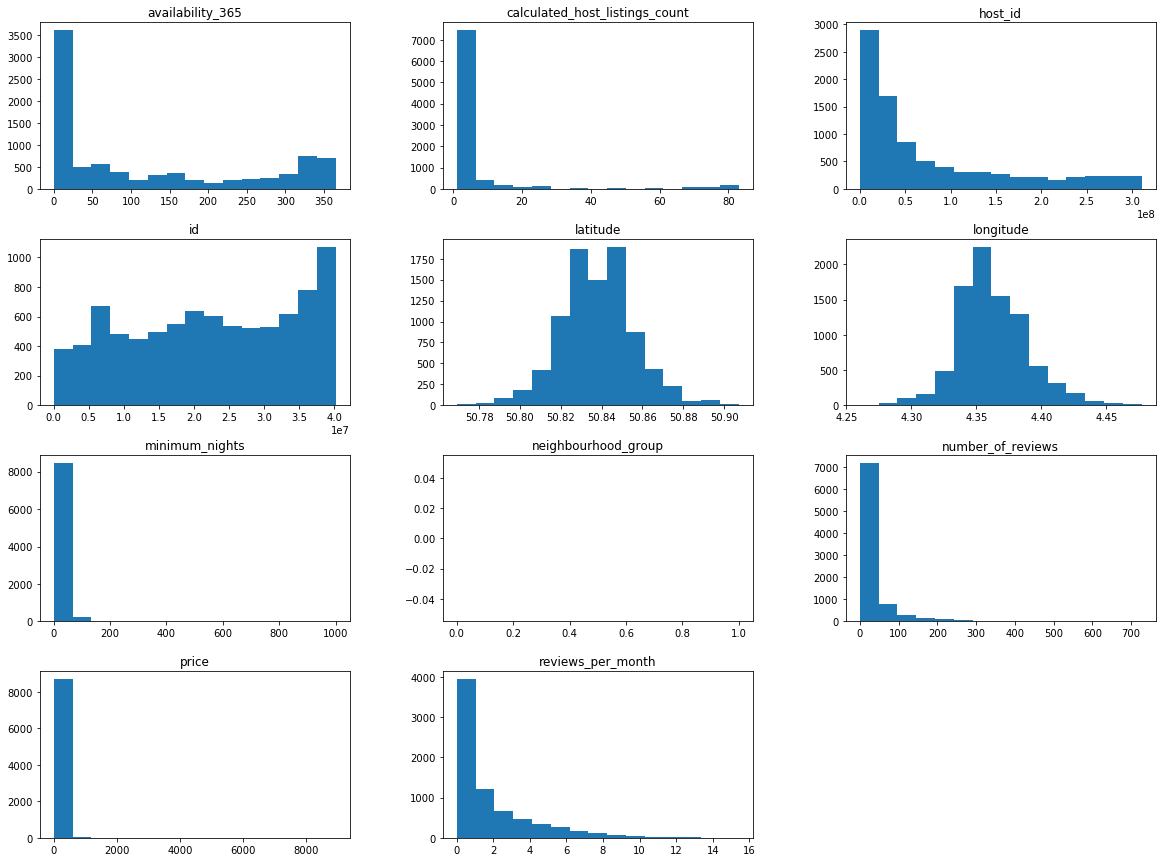

In [27]:
# Plotando o histograma dos atributos numéricos
df_bru.hist(bins=15, figsize=(20, 15), grid=False);

Verificando os histogramas dos atributos numéricos, podemos perceber que há indicativo de possíveis *outliers*.
Por exemplo, se analisarmos os atributos `price`, `calculated_host_listings_count`, `availability_365` e `minimum_nights`, percebemos os valores não seguem uma distribuição distorcendo a representação gráfica.

Sendo assim, iremos fazer uma análise mais profunda dos atributos numéricos e assim verificarmos se, realmente, há *outliers* nesses atributos.

### **Resumo estatístico dos atributos numéricos**

In [28]:
# Resumo estatísco dos atributos numéricos
atr_num = ['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']

df_bru[atr_num].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
count,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,7348.000000
mean,119.425066,6.186791,6.951611,30.511524,75.274854,1.850625
std,132.594799,15.328126,28.464318,59.858632,147.871020,2.246489
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000
25%,0.000000,1.000000,1.000000,2.000000,40.000000,0.290000
50%,59.000000,1.000000,2.000000,8.000000,60.000000,0.960000
75%,250.000000,3.000000,3.000000,29.000000,85.000000,2.580000
max,365.000000,83.000000,1000.000000,727.000000,8944.000000,15.410000


Com o resumo estatístico, podemos perceber:
- O atributo `price` apresenta como valor máximo 8944, sendo que 75% dos seus valores estão abaixo de 85;
- O valor máximo da quantidade mínima de noites (`minimum_nights`) é 1000, muito acima de 365 dias por ano, e ainda 75% dos valores estão abaixo de 3;
- O valor máximo do atributo `calculated_host_listings_count` é 83, sendo que 75% dos seus valores estão abaixo de 3.

#### **Bloxpot para `price`**

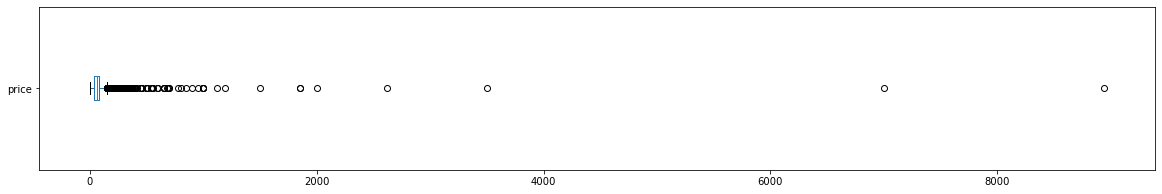


price: valores acima de 300
89 entradas
1.0205 %


In [29]:
# price
df_bru.price.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Verificar quantidade de valores acima de 300
print("\nprice: valores acima de 300")
print(len(df_bru[df_bru.price > 300]), "entradas")
print("{:.4f} %".format((len(df_bru[df_bru.price > 300]) / df_bru.shape[0]) * 100))

#### **Bloxpot para `minimum_nights`**

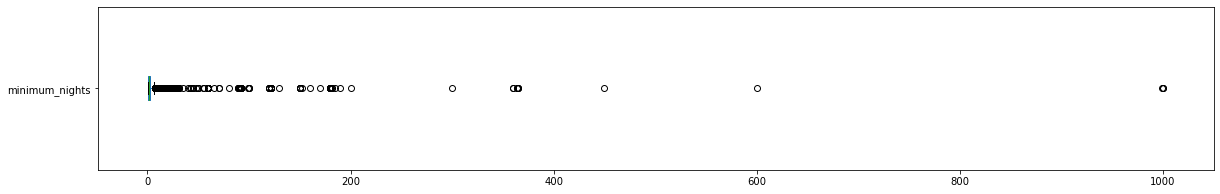


price: valores acima de 30
294 entradas
3.3712 %


In [30]:
# minimum_nights
df_bru.minimum_nights.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Verificar quantidade de valores acima de 30
print("\nprice: valores acima de 30")
print(len(df_bru[df_bru.minimum_nights > 30]), "entradas")
print("{:.4f} %".format((len(df_bru[df_bru.minimum_nights > 30]) / df_bru.shape[0]) * 100))

#### **Boxplot para `calculated_host_listings_count`**

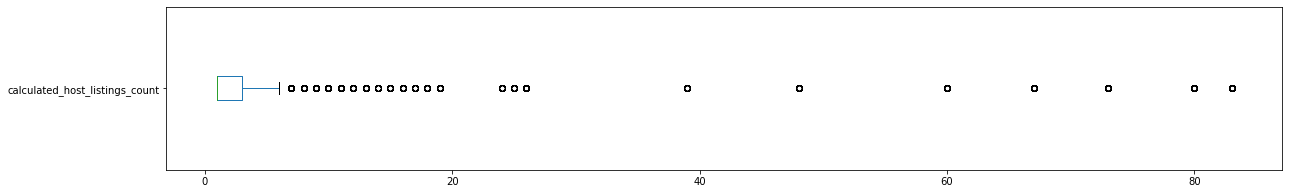


price: valores acima de 10
935 entradas
10.7212 %


In [31]:
# calculated_host_listings_count
df_bru.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Verificar quantidade de valores acima de 10
print("\nprice: valores acima de 10")
print(len(df_bru[df_bru.calculated_host_listings_count > 10]), "entradas")
print("{:.4f} %".format((len(df_bru[df_bru.calculated_host_listings_count > 10]) / df_bru.shape[0]) * 100))

### **Distribuição das variáveis sem `outliers`**

Como foi identificado *outliers* nos atributos `price` e `minimum_nights`, iremos remover esses *outliers* do conjunto de dados e plotar o histograma.

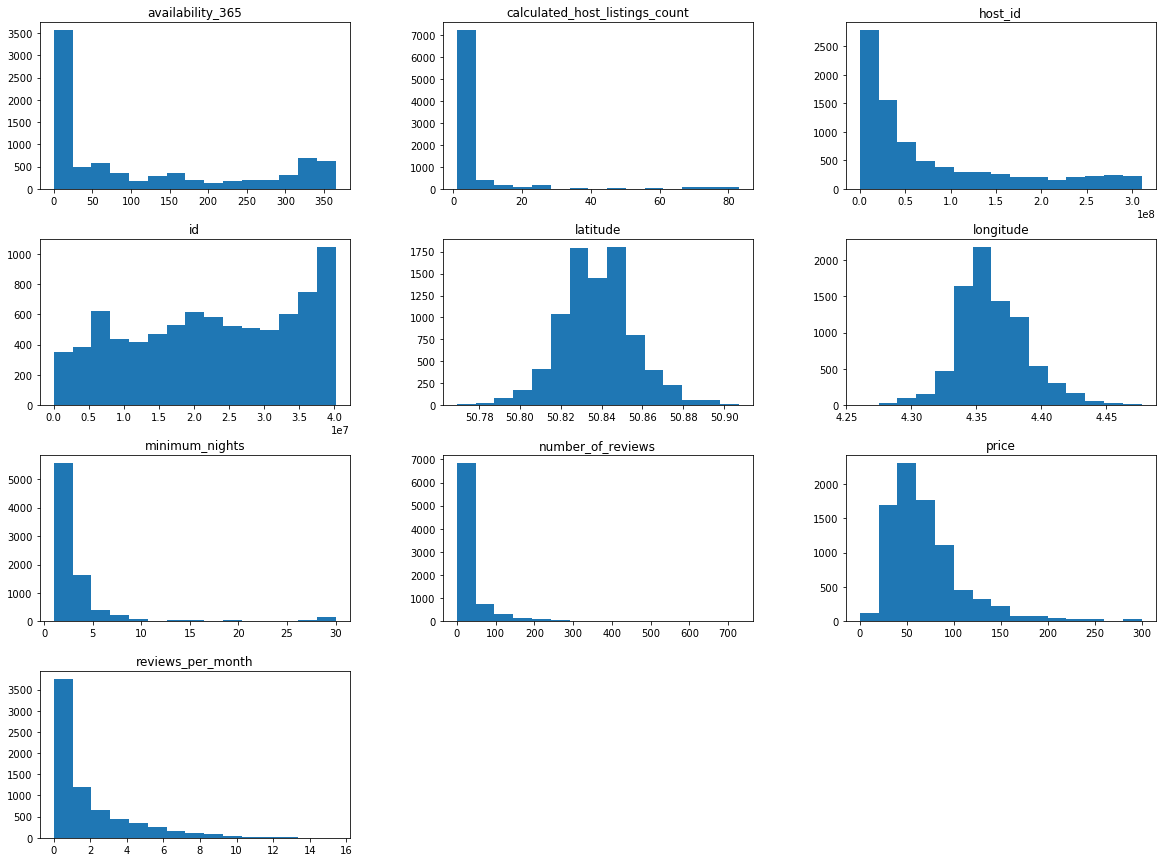

In [32]:
# Removendo os outliers em um novo dataframe
df_bru_clean = df_bru.copy()
df_bru_clean.drop(df_bru_clean[df_bru_clean.price > 300].index, axis = 0, inplace = True)
df_bru_clean.drop(df_bru_clean[df_bru_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# Removendo o atributo 'neighbourhood_group', pois o mesmo está vazio
df_bru_clean.drop('neighbourhood_group', axis = 1, inplace = True)

# Plotando o histograma para os atributos numéricos
df_bru_clean.hist(bins=15, figsize=(20, 15), grid=False);

### **Correlação entre os atributos**

> Correlação é qualquer relação estatística (causal ou não causal) entre dois atributos ou variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre dois atributos ou variáveis (Para mais informações: [clique aqui](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o))

Com isso, iremos verificar a correlação entre os atributos do conjunto de dados utilizando método de Pearson:

In [33]:
# Criando a matriz de correlação apenas com os atributos numéricos
corr = df_bru_clean[atr_num].corr()

display(corr)

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
availability_365,1.000000,0.229738,0.052533,0.206165,0.242936,0.149328
calculated_host_listings_count,0.229738,1.000000,0.082899,0.003128,0.218213,-0.040957
minimum_nights,0.052533,0.082899,1.000000,-0.128553,-0.008471,-0.209545
number_of_reviews,0.206165,0.003128,-0.128553,1.000000,-0.012057,0.591542
price,0.242936,0.218213,-0.008471,-0.012057,1.000000,-0.000961
reviews_per_month,0.149328,-0.040957,-0.209545,0.591542,-0.000961,1.000000


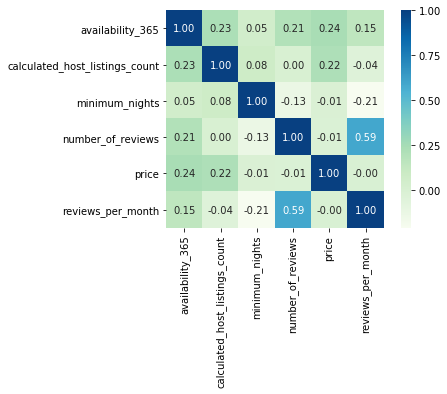

In [34]:
# Para uma melhor visualização da correlação, utilizaremos um heatmap (mapa de calor)
sns.heatmap(corr, cmap='GnBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Tipo de imóvel mais alugado**

Agora iremos verificar o tipo de imóvel mais alugado em Bruxelas pelo Airbnb. Para isso,  faremos uma contagem das ocorrências de cada tipo de quarto presente no atributo `room_type`.

In [35]:
# Quantidade de cada tipo de imóvel disponível
print("Quantidade de cada tipo de imóvel disponível:")
display(df_bru_clean.room_type.value_counts())

# Porcentagem de cada tipo de imóvel disponível
print("\nPorcentagem de cada tipo de imóvel disponível:")
display(((df_bru_clean.room_type.value_counts() / df_bru_clean.shape[0]) * 100).round(2))

Quantidade de cada tipo de imóvel disponível:


Entire home/apt    5476
Private room       2702
Hotel room           91
Shared room          77
Name: room_type, dtype: int64


Porcentagem de cada tipo de imóvel disponível:


Entire home/apt    65.61
Private room       32.37
Hotel room          1.09
Shared room         0.92
Name: room_type, dtype: float64

### **Preço das localidades em Bruxelas**

Agora vamos comparar os bairros (*neighbourhoods*) utilizando o preço de locação.

In [36]:
df_bru_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)

neighbourhood
Bruxelles                81.86
Berchem-Sainte-Agathe    70.60
Uccle                    68.99
Watermael-Boitsfort      67.81
Woluwe-Saint-Pierre      67.11
Saint-Josse-ten-Noode    66.33
Ixelles                  66.06
Anderlecht               64.05
Saint-Gilles             62.79
Auderghem                62.68
Koekelberg               60.72
Forest                   59.98
Molenbeek-Saint-Jean     59.79
Schaerbeek               58.41
Etterbeek                58.36
Woluwe-Saint-Lambert     58.24
Jette                    58.21
Ganshoren                57.18
Evere                    50.53
Name: price, dtype: float64

Analisando os preços por bairro em Bruxelas, não há uma grande variação no preço. Sendo o bairro (na Bélgica, é chamado de [comuna](https://pt.wikipedia.org/wiki/Comunas_da_Regi%C3%A3o_de_Bruxelas-Capital)) de *Bruxelles* o mais caro e o bairro de *Evere* o mais barato.

Ainda, vamos visualizar a quantidade de imóveis por bairro:

In [37]:
# Quantidade de imóveis por bairro
print("Quantidade de imóveis por bairro:")
display(df_bru_clean.neighbourhood.value_counts(ascending=False))

Quantidade de imóveis por bairro:


Bruxelles                2521
Ixelles                  1455
Saint-Gilles              919
Schaerbeek                535
Etterbeek                 484
Forest                    447
Uccle                     398
Anderlecht                330
Saint-Josse-ten-Noode     218
Woluwe-Saint-Lambert      217
Molenbeek-Saint-Jean      198
Woluwe-Saint-Pierre       125
Auderghem                 123
Jette                      99
Watermael-Boitsfort        95
Evere                      77
Koekelberg                 47
Ganshoren                  33
Berchem-Sainte-Agathe      25
Name: neighbourhood, dtype: int64

Como temos a latitude e a longitude de cada imóvel, podemos plotar esses dois atributos e termos uma ideia do local de caa imóvel em Bruxelas:

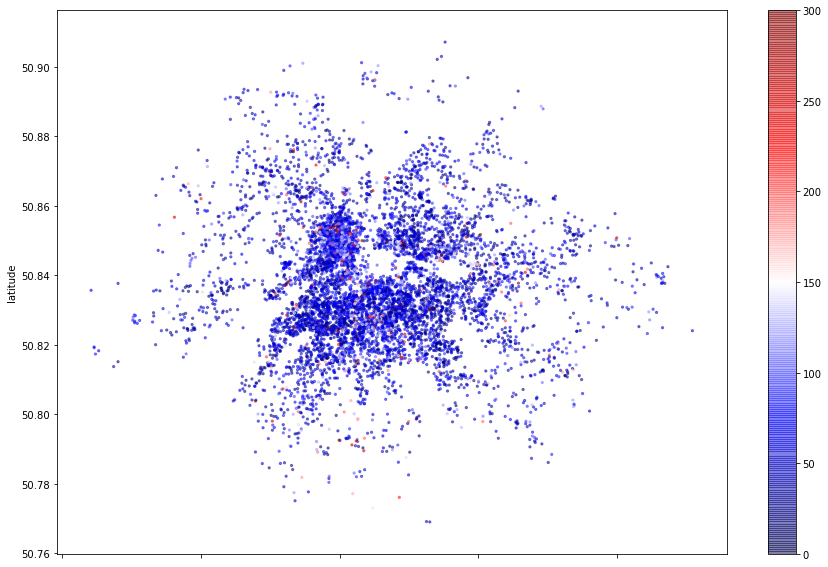

In [38]:
# Plot dos imóveis de Bruxelas pela da latitude-longitude e preço
df_bru_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_bru_clean['price'], s=5, cmap=plt.get_cmap('seismic'), figsize=(15,10));

Agora verificaremos o **preço médio** do aluguel dos imóveis em Bruxelas:

In [39]:
# Média do preço
print("Preço médio:", "€", df_bru_clean.price.mean().round(2))

Preço médio: € 68.62


Ainda podemos verificar, a **média do mínimo de pernoites** que podemos alugar:

In [40]:
# Média do mínimo de pernoites
print("Média do mínimo de pernoites:", df_bru_clean.minimum_nights.mean().round(2))

# Mediana do mínimo de pernoites
print("Mediana do mínimo de pernoites:", df_bru_clean.minimum_nights.median())

Média do mínimo de pernoites: 3.29
Mediana do mínimo de pernoites: 2.0


## **Considerações finais**

Analisando o conjunto de dados de Bruxelas na Bélgica disponibilizado pelo Airbnb, podemos concluir que:
- O preço médio para se hospedar me Bruxelas é €68.62, que é um preço relativamente baixo.
- O bairro (comuna) com maior preço médio é *Bruxelles* (€81.86); e o com menor preço médio é *Evere* (€50.53).
- O bairro (comuna) com maior quantidade de hospedagens é *Bruxelles* com 2521 imóveis para alugar; e o com menor quantidade é *Berchem-Sainte-Agathe* com 25 imóveis para alugar.
- Pelo gráfico latitude-longitude e preço, percebe-se que a maior parte dos imóveis está localizado na área central e vai diminuindo conforme se afastava do centro.
- A média da quantidade mínima de pernoites é 3.29 e a mediana é 2.
- O tipo de imóvel mais comum para alugar é casa ou apartamento inteiro (`Entire home/apt`).